In [9]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import misc
from segmentation import castClrs

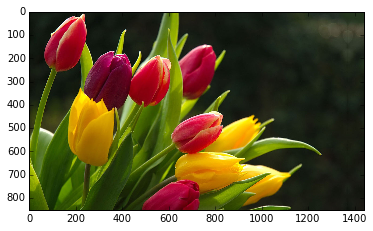

In [10]:
image = misc.imread('flower.jpg')
plt.imshow(image)

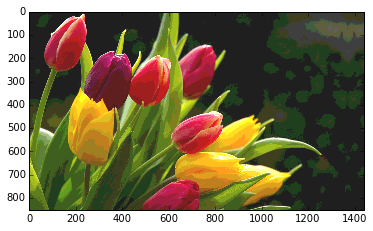

In [11]:
segmentObj = castClrs(image)
segmentObj.segment(segC0=8, segC1=8, segC2=8, clrs='rgb', mode='ceil')
plt.imshow(image)
segmentObj.showRGB()